![](https://deeplizard.com/images/pytorch-logo-dark.svg)

## 0.Beginning

深度学习模型的构建流程：
1. 数据准备
2. 构建模型
3. 训练模型
4. 测试模型性能

本文基于Pytorch的教学，重新梳理神经网络入门教程，为未来进行相关培训提供支撑。

[Neural Network Programming - Deep Learning with PyTorch](https://deeplizard.com/learn/video/v5cngxo4mIg)

	• Part 1: PyTorch and Tensors
		○ Section 1: Introducing PyTorch
			§ PyTorch Prerequisites - Neural Network Programming Series
			§ PyTorch Explained - Python Deep Learning Neural Network API
			§ PyTorch Install - Quick and Easy
			§ CUDA Explained - Why Deep Learning Uses GPUs
		○ Section 2: Introducing Tensors
			§ Tensors Explained - Data Structures of Deep Learning
			§ Rank, Axes, and Shape Explained - Tensors for Deep Learning
			§ CNN Tensor Shape Explained - CNNs and Feature Maps
		○ Section 3: PyTorch Tensors
			§ PyTorch Tensors Explained - Neural Network Programming
			§ Creating PyTorch Tensors for Deep Learning - Best Options
		○ Section 4: Tensor Operations
			§ Flatten, Reshape, and Squeeze Explained - Tensors for Deep Learning
			§ CNN Flatten Operation Visualized - Tensor Batch Processing
			§ Tensors for Deep Learning - Broadcasting and Element-wise Operations
			§ ArgMax and Reduction Ops - Tensors for Deep Learning
	• Part 2: Neural Networks and Deep Learning with PyTorch（14-）
		○ Section 1: Data and Data Processing
			§ Importance of Data in Deep Learning - Fashion MNIST for AI
			§ Extract, Transform, Load (ETL) - Deep Learning Data Preparation
			§ PyTorch Datasets and DataLoaders - Training Set Exploration
		○ Section 2: Neural Networks and PyTorch Design
			§ Build PyTorch CNN - Object Oriented Neural Networks
			§ CNN Layers - Deep Neural Network Architecture
			§ CNN Weights - Learnable Parameters in Neural Networks
			§ Callable Neural Networks - Linear Layers in Depth
			§ CNN Forward Method - Deep Learning Implementation
			§ Forward Propagation Explained - Pass Image to PyTorch Neural Network
			§ Neural Network Batch Processing - Pass Image Batch to PyTorch CNN
			§ CNN Output Size Formula - Bonus Neural Network Debugging Session
		○ Section 3: Training Neural Networks
			§ CNN Training with Code Example - Neural Network Programming
			§ Analyzing results of CNN with confusion matrix

## Tensor

- number
- scalar
- array
- vector
- 2d-array
- matrix


Flatten()

Squeeze()

view()

numel()

torch.cat  vs  torch.stack

BroadCasting

## DataSet and DataLoader

- Extract – Get the Fashion-MNIST image data from the source.
- Transform – Put our data into tensor form.
- Load – Put our data into an object to make it easily accessible.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt

import torchvision
import torchvision.transforms as transforms

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

In [3]:
from torch.utils.data import Dataset, DataLoader

In [4]:
train_set = torchvision.datasets.FashionMNIST(
    root='/home/inesa/data/mnist',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

In [5]:
data_dl = DataLoader(train_set, batch_size=20, shuffle=True)

### train_set

In [160]:
train_set.train_labels

tensor([5, 0, 4,  ..., 5, 6, 8])

In [161]:
train_set.train_labels.bincount()

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [9]:
sample = next(iter(train_set))

In [12]:
image,label = sample

In [13]:
label

tensor(5)

In [14]:
image.size()

torch.Size([1, 28, 28])

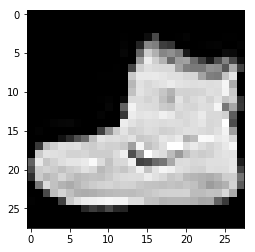

In [16]:
plt.imshow(image.squeeze(),cmap="gray")

### DataLoader

In [25]:
images, label = next(iter(data_dl))

In [26]:
images.size()

torch.Size([20, 1, 28, 28])

In [27]:
label.size()

torch.Size([20])

In [28]:
grid = torchvision.utils.make_grid(images, nrow=10)

In [29]:
grid.size()

torch.Size([3, 62, 302])

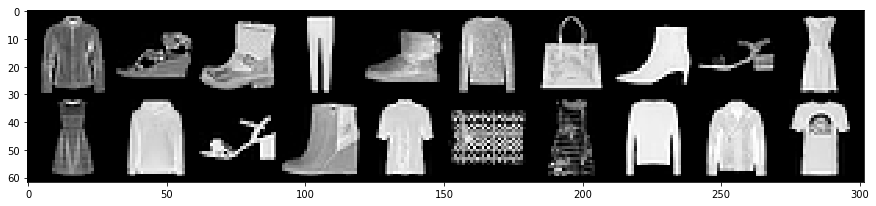

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

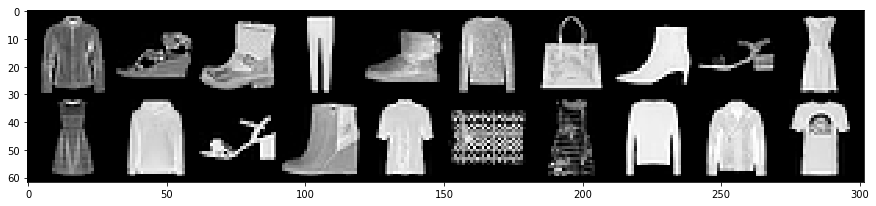

In [32]:
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

## Neural Network

> 1. Extend the `nn.Module` base class
> 2. Define layers as class attributes
> 3. Implement the `forward()` method

In [6]:
class SampleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,12,5)
 
        self.fc1 = nn.Linear(12*4*4, 120) 
        self.fc2 = nn.Linear(120, 60) 
        self.out = nn.Linear(60, 10)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        x = x.view(-1, 12*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.out(x)
        #x = F.softmax(x, dim=1)

        return x

In [55]:
net = SampleCNN()

In [56]:
net

SampleCNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [38]:
net.conv1.weight

Parameter containing:
tensor([[[[-1.4235e-02, -1.2056e-01, -1.9503e-01,  5.1249e-02, -1.0233e-02],
          [ 7.2625e-02,  6.0955e-02,  8.0624e-02,  6.4345e-02, -3.1542e-02],
          [-9.1273e-03,  8.7983e-02, -1.2143e-02,  1.4761e-01,  1.0614e-01],
          [ 1.0964e-02, -1.7896e-02,  1.5588e-01,  1.7097e-01, -1.6070e-01],
          [-1.0009e-01,  4.1335e-02, -1.8589e-01, -8.4157e-02, -1.8729e-01]]],


        [[[-1.0471e-01, -1.8119e-01, -1.5301e-01,  1.1622e-01,  5.6573e-02],
          [-3.0975e-02, -1.9177e-01, -1.9091e-01, -4.0877e-03,  2.5865e-03],
          [-1.9646e-01, -4.3966e-03,  8.4303e-02, -1.2827e-01, -4.3744e-02],
          [-1.5605e-01, -5.1939e-02,  8.4544e-02,  9.1923e-02, -1.6217e-01],
          [-8.2174e-02, -7.9102e-02, -8.4358e-02,  9.5897e-02,  1.9789e-01]]],


        [[[ 1.6713e-02,  1.4351e-01,  2.8280e-03,  2.6159e-04, -1.7083e-01],
          [ 1.3111e-01,  1.0493e-01,  1.5118e-01,  3.7053e-02,  2.3867e-02],
          [ 1.7716e-01, -8.5104e-03, -1.7793e-

In [40]:
net.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [43]:
for name,params in net.named_parameters():
    print(name, '\t\t', params.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [49]:
for param in net.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


### callable

Instead of calling the forward() method directly, we call the object instance. After the object instance is called, the `__call__()` method is invoked under the hood, and the `__call__()` in turn invokes the forward() method. This applies to all PyTorch neural network modules, namely, networks and layers.

## Forward Propagation

> 1. Test the forward pass use a single image sample
> 2. A batch of images

In [68]:
# close the dynamic computing graph feature
torch.set_grad_enabled(False)

In [84]:
net01 = SampleCNN()

In [85]:
sample = next(iter(train_set))
image, label = sample
image.shape

torch.Size([1, 28, 28])

In [86]:
image.unsqueeze_(0).shape

torch.Size([1, 1, 28, 28])

In [87]:
pred = net01(image)

In [88]:
pred

tensor([[ 0.0921, -0.0380,  0.0970,  0.0033,  0.0017, -0.0956,  0.1186,  0.1088, -0.1152, -0.0387]])

In [89]:
pred.argmax()

tensor(6)

In [90]:
label

tensor(5)

In [91]:
F.softmax(pred)

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[0.1078, 0.0947, 0.1084, 0.0987, 0.0985, 0.0894, 0.1107, 0.1096, 0.0876, 0.0946]])

### Batch of images

In [92]:
images,labels = next(iter(data_dl))

In [93]:
images.shape

torch.Size([20, 1, 28, 28])

In [94]:
pred = net01(images)

In [95]:
pred.shape

torch.Size([20, 10])

In [96]:
pred.argmax(dim=1)

tensor([6, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6])

In [100]:
labels

tensor([7, 0, 9, 5, 0, 6, 3, 3, 1, 2, 2, 3, 1, 6, 7, 4, 4, 8, 4, 3])

In [98]:
pred.argmax(dim=1) == labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)

In [99]:
(pred.argmax(dim=1) == labels).sum()

tensor(1)

In [102]:
pred.argmax(dim=1).eq(labels).sum()

tensor(1)

In [110]:
def sample_acc(preds, labels):
    return float(preds.argmax(dim=1).eq(labels).sum())/len(labels)

In [111]:
print(sample_acc(pred, labels))

0.05


## Part3： Training

In [184]:
torch.set_grad_enabled(True)

In [185]:
net03 = SampleCNN()

In [186]:
net03

SampleCNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [187]:
train_ld = DataLoader(train_set, batch_size=100)

In [188]:
images, labels = next(iter(train_ld))

### Loss Calculate

In [189]:
preds = net03(images)
loss = F.cross_entropy(preds, labels)
print(loss)

tensor(2.3059, grad_fn=<NllLossBackward>)


In [190]:
sample_acc(preds, labels)

0.09

### Update grad

In [191]:
print(net03.conv1.weight.grad)

None


In [198]:
loss.backward()

In [193]:
print(net03.conv1.weight.grad)

tensor([[[[-4.9738e-04, -5.6704e-04, -3.3855e-04,  5.5590e-05,  1.5286e-04],
          [-7.6897e-04, -4.5558e-04, -3.7744e-04, -2.9794e-04, -8.2105e-05],
          [-4.1271e-04, -4.6933e-04, -3.5661e-04,  1.3576e-04,  8.1290e-05],
          [-2.8216e-04, -5.4808e-04, -3.3131e-04,  1.4307e-04, -7.4835e-05],
          [-2.5146e-04, -6.3728e-04, -3.7488e-04, -1.6532e-04, -3.7051e-04]]],


        [[[ 7.0550e-05, -5.4074e-05, -7.4203e-05,  3.7618e-05,  4.6334e-05],
          [ 6.4373e-05,  2.0212e-05, -2.0804e-05,  3.1059e-05,  1.8464e-05],
          [ 5.2170e-05,  3.7096e-06, -4.7322e-05,  2.7825e-05, -3.9344e-05],
          [ 7.0859e-05, -1.0576e-05,  7.3048e-05,  1.4482e-04,  5.7067e-05],
          [-5.6321e-05,  3.7066e-05,  2.4291e-04,  3.2750e-04,  2.5308e-04]]],


        [[[ 3.7896e-05,  5.2364e-04,  6.1473e-04,  2.9012e-04, -1.2164e-04],
          [ 3.2845e-04,  5.7917e-04,  3.6467e-04, -3.7496e-04, -5.1208e-04],
          [ 8.1104e-04,  5.2869e-04,  7.6739e-06, -6.7026e-04, -2.79

In [194]:
#opt = torch.optim.SGD(net03.parameters(), lr=0.1)
opt = torch.optim.Adam(net03.parameters(), lr=0.01)

In [199]:
opt.step() # Update the weights by just a function

#### once more

In [200]:
preds = net03(images)
loss = F.cross_entropy(preds, labels)
print(loss)

tensor(2.3413, grad_fn=<NllLossBackward>)


In [201]:
sample_acc(preds, labels)

0.14

In [203]:
network = SampleCNN()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss

loss.backward() # Calculate Gradients
optimizer.step() # Update Weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.2981719970703125
loss2: 2.2795302867889404


In [218]:
loss.backward() # Calculate Gradients
optimizer.step() # Update Weights

preds = network(images)
loss = F.cross_entropy(preds, labels)
print(loss.item())

2.148524522781372


### Training Loop

In [58]:
def sample_acc(preds, labels):
    return float(preds.argmax(dim=1).eq(labels).sum())/len(labels)

In [59]:
class SampleCNN02(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

In [45]:
def fit(epochs, train_ld, model, opt):
    for i in range(epochs):
        for j, (images, labels) in enumerate(train_ld):
            preds = model(images)
            loss =  F.cross_entropy(preds, labels)
            acc = sample_acc(preds, labels)
            
            opt.zero_grad()    
            loss.backward()
            opt.step()
            
            if (j+1) % 100 == 0:
                    print ('Epoch : %d/%d,   Loss: %.4f  Acc: %.4f' 
                           %(j+1, len(train_ld)/64, loss, acc))
            
        #print("Epoch %d: loss is %f | Accuracy is %f" %(i, loss, acc))

#### 如下，使用小批量数据，查看模型的拟合性，是否能够完全拟合模型

In [ ]:
sampeData = DataLoader(train_set, batch_size=1000,shuffle=True)

In [ ]:
images, labels = next(iter(sampeData))

In [64]:
def fit_sample(epochs, images, labels, model, opt):
    for i in range(epochs):
        preds = model(images)
        loss =  F.cross_entropy(preds, labels)
        acc = sample_acc(preds, labels)

        opt.zero_grad()    
        loss.backward()
        opt.step()
        if (i+1) % 50 == 0:
            print ('Epoch : %d/%d,   Loss: %.4f  Acc: %.4f' 
                   %(i+1, epochs, loss, acc))

        #print("Epoch %d: loss is %f | Accuracy is %f" %(i, loss, acc))

In [65]:
net04 = SampleCNN02()
#data = DataLoader(train_set, batch_size=64,shuffle=True)
opt = torch.optim.Adam(net04.parameters(), lr=0.01)
#opt = torch.optim.SGD(net04.parameters(), lr=0.001, momentum=0.9)

In [66]:
fit_sample(1000, images, labels, net04, opt)

Epoch : 49/1000,   Loss: 2.2879  Acc: 0.1230
Epoch : 99/1000,   Loss: 2.2137  Acc: 0.1920
Epoch : 149/1000,   Loss: 2.1410  Acc: 0.2300
Epoch : 199/1000,   Loss: 2.0308  Acc: 0.2800
Epoch : 249/1000,   Loss: 1.8836  Acc: 0.3520
Epoch : 299/1000,   Loss: 1.6994  Acc: 0.4250
Epoch : 349/1000,   Loss: 1.5369  Acc: 0.4900
Epoch : 399/1000,   Loss: 1.3430  Acc: 0.5570
Epoch : 449/1000,   Loss: 1.1190  Acc: 0.6550
Epoch : 499/1000,   Loss: 1.0680  Acc: 0.6590
Epoch : 549/1000,   Loss: 0.8058  Acc: 0.7830
Epoch : 599/1000,   Loss: 0.6816  Acc: 0.8150
Epoch : 649/1000,   Loss: 0.5530  Acc: 0.8660
Epoch : 699/1000,   Loss: 0.4514  Acc: 0.9050
Epoch : 749/1000,   Loss: 0.3913  Acc: 0.9220
Epoch : 799/1000,   Loss: 0.2710  Acc: 0.9730
Epoch : 849/1000,   Loss: 0.2117  Acc: 0.9910
Epoch : 899/1000,   Loss: 0.1662  Acc: 0.9960
Epoch : 949/1000,   Loss: 0.1307  Acc: 0.9980
Epoch : 999/1000,   Loss: 0.1040  Acc: 0.9990


In [46]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [47]:
net05 = CNN()
data = DataLoader(train_set, batch_size=64,shuffle=True)
opt = torch.optim.Adam(net05.parameters(), lr=0.01)

In [ ]:
fit(1, data, net05, opt)

Epoch : 100/14,   Loss: 2.3035  Acc: 0.0625
Epoch : 200/14,   Loss: 2.3047  Acc: 0.0938
Epoch : 300/14,   Loss: 2.3100  Acc: 0.0938
